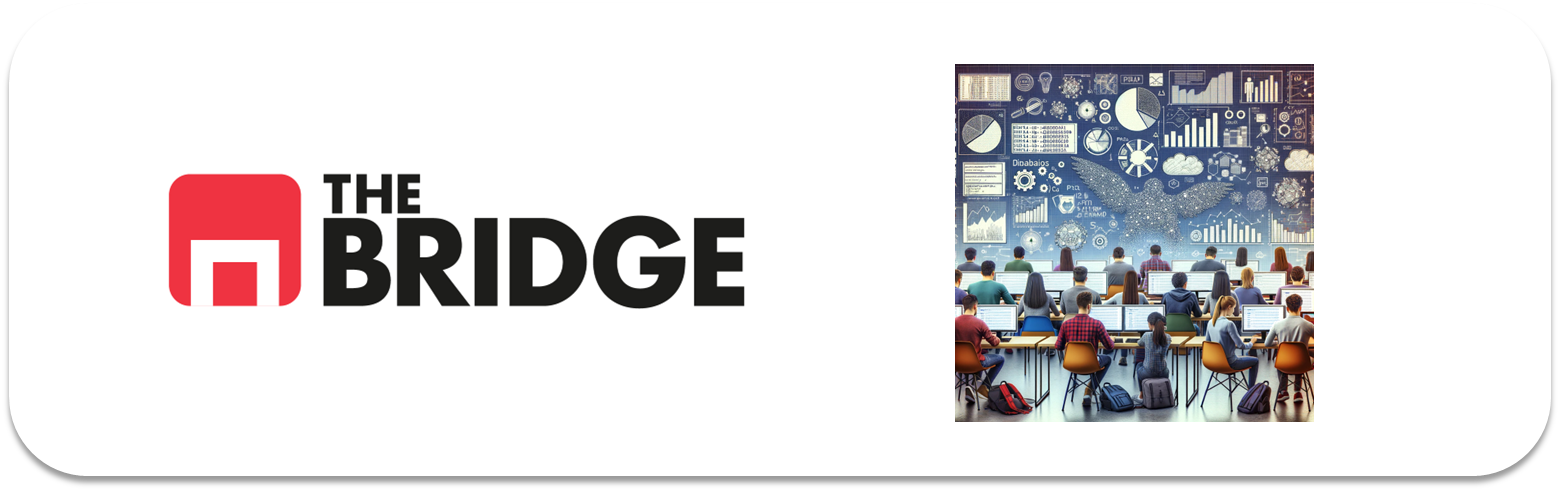

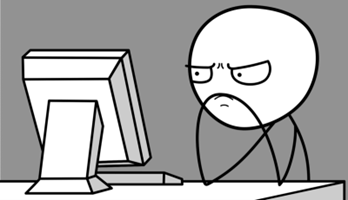

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_grouped_histograms, plot_combined_graphs


### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [2]:
df = pd.read_csv("./data/advertising_ml.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35 years,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31 years,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26 years,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29 years,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35 años,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


-Age la convertiría numérica usando expresiones regulares
-timestamp a datetime
-male crearía una categórica binaria

In [4]:
df["Age"] = (df["Age"].str.extract(r"(\d+)").astype(int))
df["time"] = pd.to_datetime(df["Timestamp"])


In [5]:
df = df.drop(columns=["Timestamp"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Clicked on Ad             1000 non-null   int64         
 9   time                      1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.3+ KB


### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

* Objetivo de negocio: dirigir mejor la campaña de anuncios
* Objetivo tecnico: generar un modelo para predecir si un usuario pulsará en el anuncio
* Tipo de modelado (supervisado, no supervisado): supervisado
* Features: 
* Target, si hay (variable a predecir): Clicked on Ad
* Tipo de problema (clasificación, regresión, etc): clasificación
* Métrica de Evaluacion:
* Separación Train-Test: 


### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definicón de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

Daily Time Spent on Site: Tiempo medio diario (en minutos) que el usuario pasa en el sitio web.
Age: Edad del usuario (en años).
Area Income: Ingreso medio anual del área geográfica donde vive el usuario (normalmente en dólares).
Daily Internet Usage: Tiempo medio diario (en minutos) que el usuario usa internet en general.
Ad Topic Line: Texto o eslogan principal del anuncio mostrado al usuario.
City: Ciudad de residencia del usuario.
Male: Indicador binario de género: 1 = masculino 0 = femenino
Country: País de residencia del usuario.
Clicked on Ad :Variable objetivo (target): 1 = el usuario hizo clic en el anuncio 0 = no hizo clic
time: Fecha y hora en la que el usuario vio o interactuó con el anuncio.

In [6]:
# Función que calcula la cardinalidad y el tipo de variable
def cardinalidad(df_in, umbral_categoria = 10, umbral_continua = 20):
    resultado = []
    for col in df_in.columns:
        card = df_in[col].nunique()
        porc_card = df_in[col].nunique()/len(df_in) * 100
        tipo = df_in[col].dtypes
        if card == 2:
            clasif = "Binaria"
        elif card < umbral_categoria:
            clasif = "Categórica"
        elif card >= umbral_categoria:
            if porc_card >= umbral_continua:
                clasif = "Numérica Continua"
            else:
                clasif = "Numérica Discreta"

        # Añadimos los resultados a la lista
        resultado.append({
            "columna": col,
            "tipo": tipo,
            "cardinalidad": card,
            "porcentaje_card": porc_card,
            "clasificacion": clasif
        })
            
    # Convertimos la lista de dicts en dataframe
    df_resul = pd.DataFrame(resultado)
        
    return df_resul

In [7]:
cardinalidad(df)

,columna,tipo,cardinalidad,porcentaje_card,clasificacion
0,Daily Time Spent on Site,float64,900,90.0,Numérica Continua
1,Age,int64,43,4.3,Numérica Discreta
2,Area Income,float64,1000,100.0,Numérica Continua
3,Daily Internet Usage,float64,966,96.6,Numérica Continua
4,Ad Topic Line,object,1000,100.0,Numérica Continua
5,City,object,969,96.9,Numérica Continua
6,Male,int64,2,0.2,Binaria
7,Country,object,237,23.7,Numérica Continua
8,Clicked on Ad,int64,2,0.2,Binaria
9,time,datetime64[ns],1000,100.0,Numérica Continua


### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

In [8]:
# duplicados
df.drop_duplicates(inplace=True)
df.shape

(1000, 10)

No hay duplicados, vamos a ver ahora los outliers de algunas columnas

(6, 2)


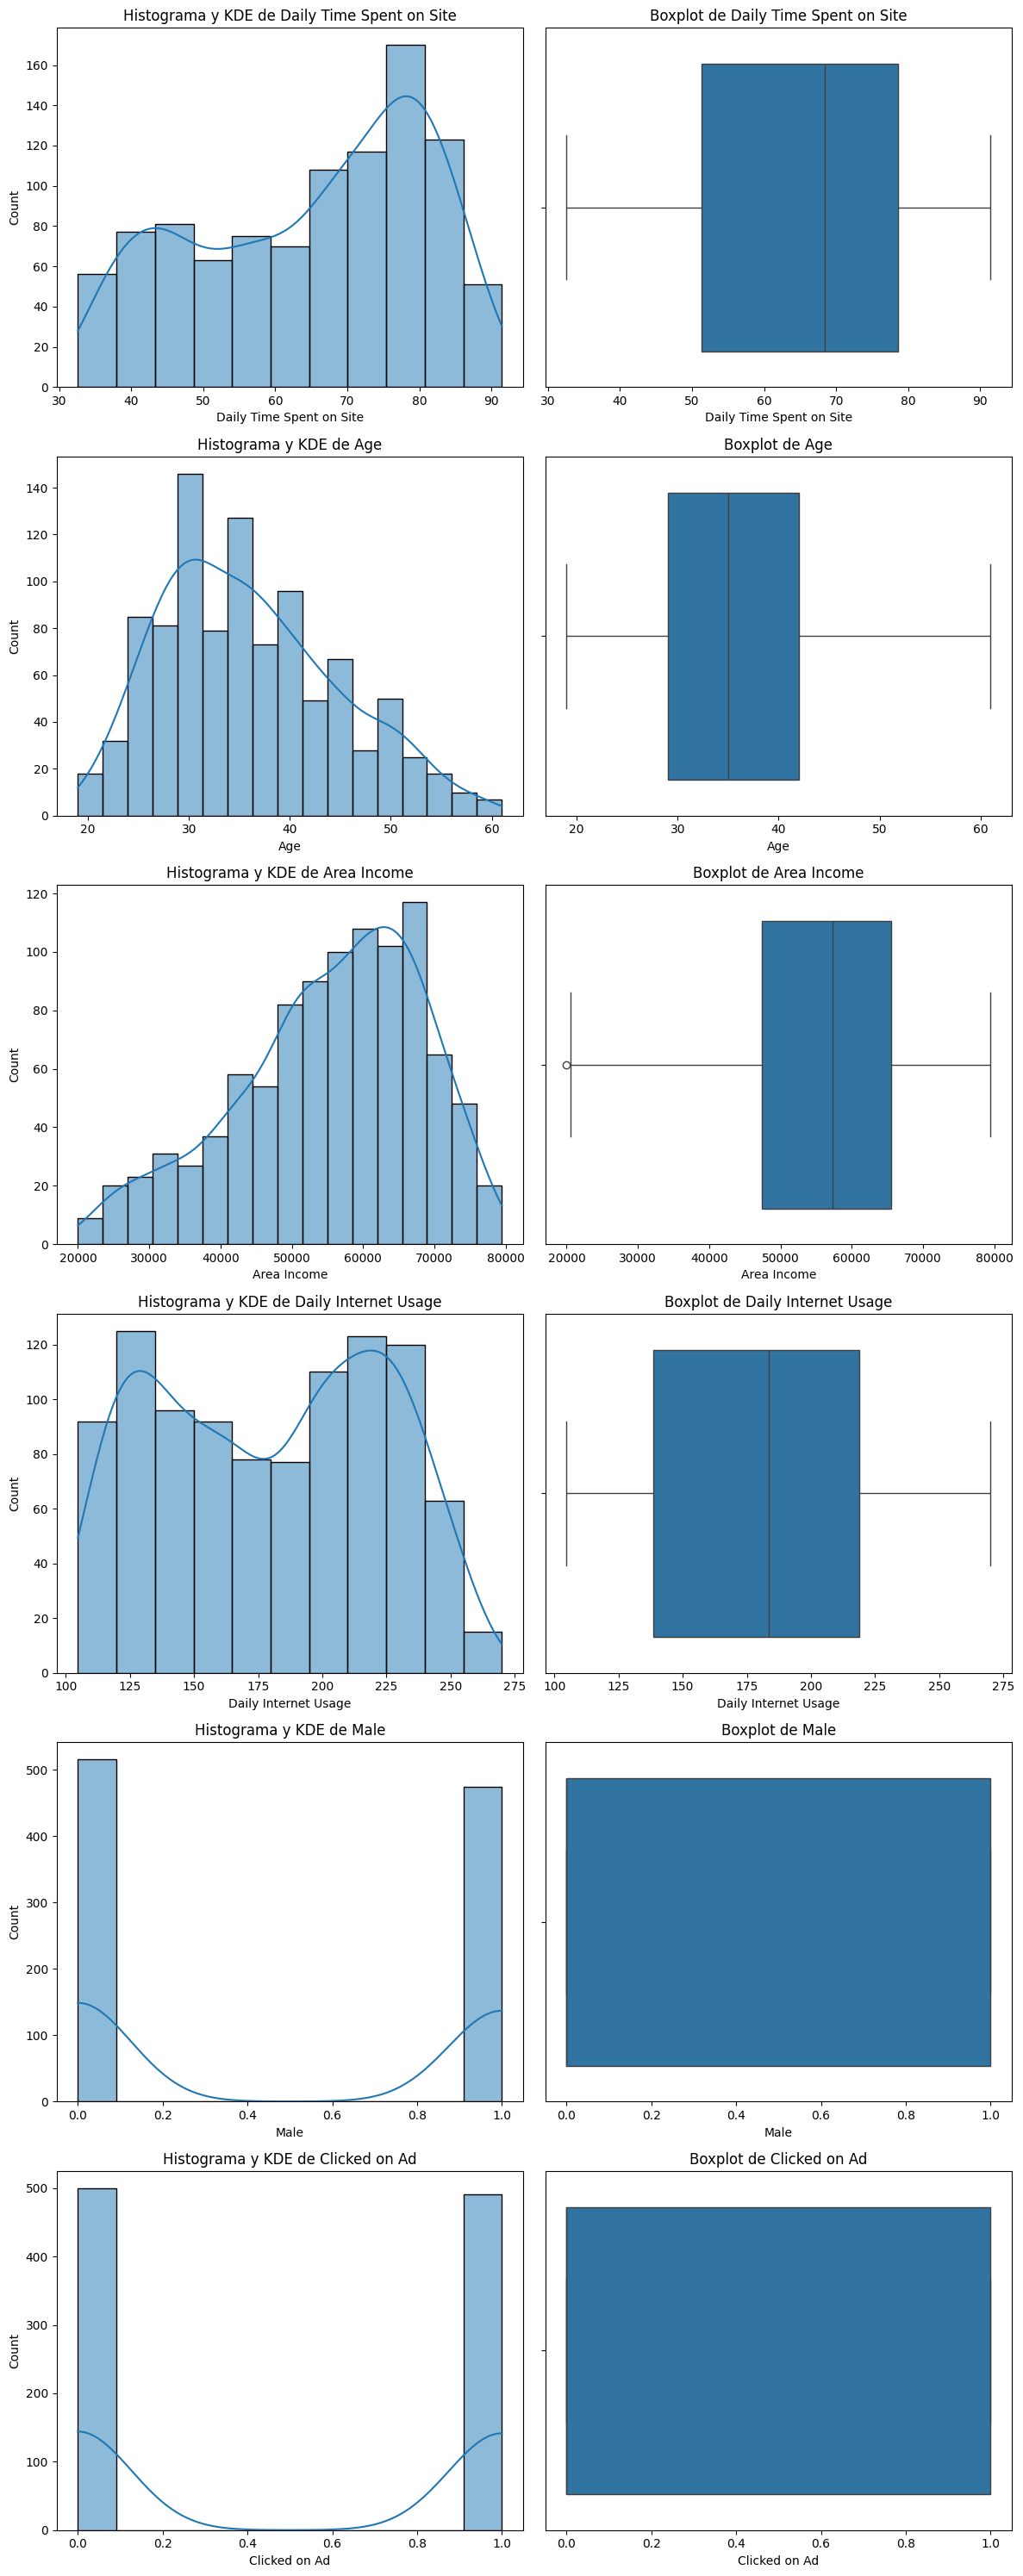

In [18]:
columnas_numericas = ["Daily Time Spent on Site","Age","Area Income","Daily Internet Usage", "Male", "Clicked on Ad"]
plot_combined_graphs(df, columnas_numericas)

In [10]:
# voy a quitar los outliers de Area Income ya que son valores por debajo, no de ingresos altos
Q1 = df["Area Income"].quantile(0.25)
Q3 = df["Area Income"].quantile(0.75)
IQR = Q3 - Q1

limite_inf = Q1 - 1.5 * IQR

df = df[df["Area Income"] >= limite_inf]


In [11]:
df.shape

(991, 10)

### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [12]:
# separación train-test
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

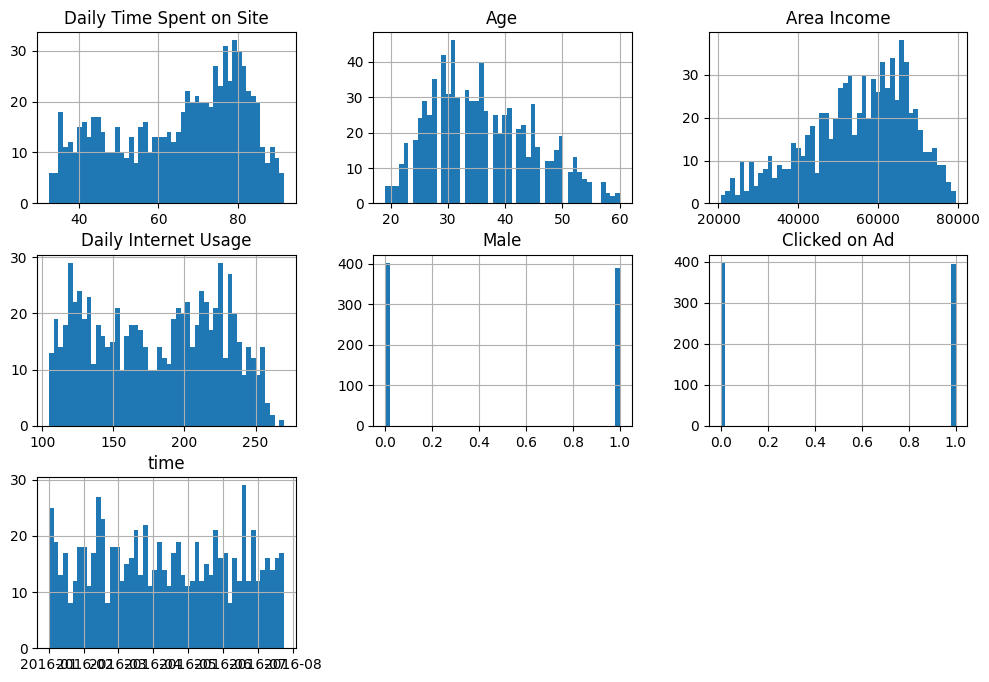

In [13]:
# análisis univariante numéricas
train_set.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

In [19]:
# análisis multivariante numéricas vs target numerica
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix["Clicked on Ad"].sort_values(ascending = False)


Clicked on Ad               1.000000
Age                         0.497470
Male                       -0.037922
Area Income                -0.499757
Daily Time Spent on Site   -0.741584
Daily Internet Usage       -0.783054
Name: Clicked on Ad, dtype: float64

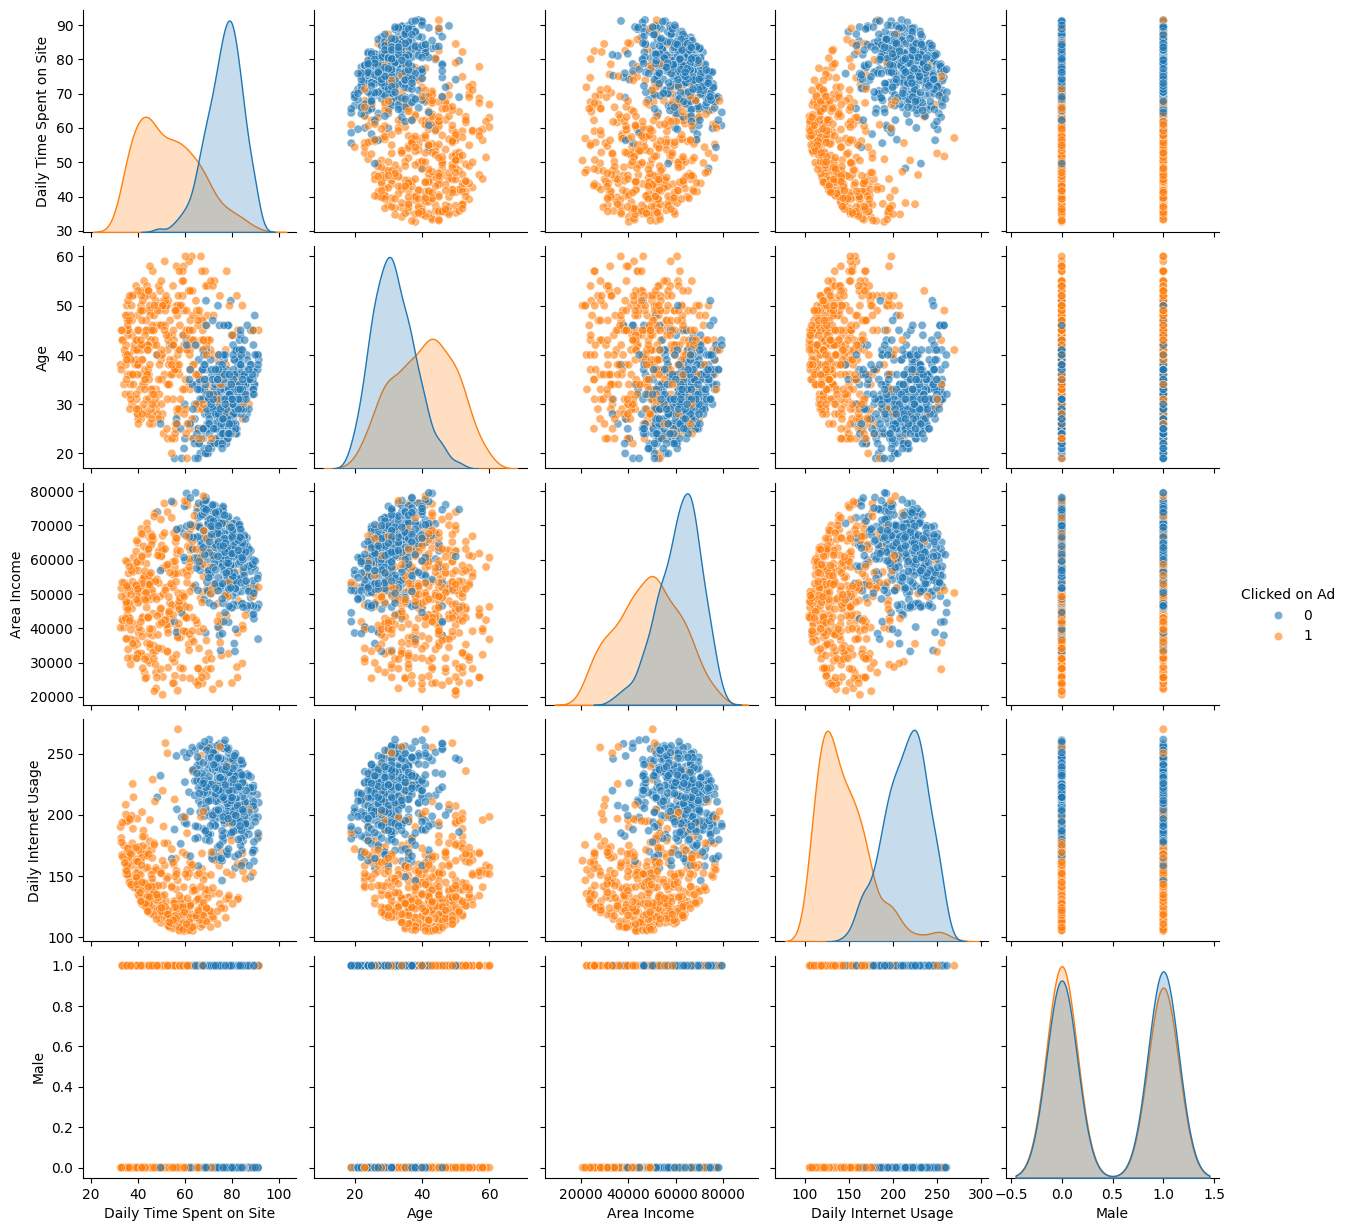

In [20]:
sns.pairplot(
    train_set[columnas_numericas],
    hue="Clicked on Ad",
    diag_kind="kde",
    plot_kws={"alpha": 0.6}
)

### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selecció de features:

In [ ]:
# Descartamos Male ya que no tiene apenas correlación, nos quedamos con las demás